In [5]:
import numpy as np
import matplotlib.pyplot as plt
#Information taking from: https://www.britannica.com/science/game-theory

# Game Theory - Find the saddlepoint

Given two parties with 3 differents choices about the elections; support, oppose & evade. 
The aim is to find give any matrix find the saddlepoint with an algorithm.

The following image shows the game behaviour depending of the choice of each contendant.

<img src="Repre.webp" alt="drawing" width="600px"/>

The principal idea in our algorithm is:

1. Define the two vectors A & B.
2. Take a random sample of the decitions of A & B and store the value.
3. Evaluate the higgest value in the sample.
4. Increased the probability that the sample apper more often.
5. Repeat.

In [6]:
# Define the Vectors probabilities
# This is always a matrix of probabilities / in the quantum domain it will be the amplitude probabilities vector.

A = np.array([1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]) # dim = 3x1
B = np.array([1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]) # dim = 3x1

# Define the matrix

MA = np.array([[0.6, 0.2, 0.8],
               [0.8, 0.25, 0.75],
               [0.35, 0.30, 0.4]])
               
MB = np.array([[0.4, 0.8, 0.2],
               [0.2, 0.75, 0.25],
               [0.65, 0.70, 0.6]])

# define the function for probabilities 

def give_probabilities(matrix):
    return np.argmax(np.random.multinomial(1,matrix*matrix))


In [11]:
# Define algorithm
# All the vectors have the same initial probabilities.
A = np.array([1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]) # dim = 3x1
B = np.array([1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]) # dim = 3x1

Games = 100 #Number of games.
alpha = 0.001 #alpha value to increased the prefered choice.
epochs = 4000 #Number of epochs in the game

# Define the vector to storage the information related to the result in the sample.
# and the vector to find the higgest value.

TaV = np.array([0.0,0.0,0.0])
TbV = np.array([0.0,0.0,0.0])
TaNum = np.array([0,0,0])
TbNum = np.array([0,0,0])

#Variables to plot information.
A_support = []
A_oppose = []
A_evade = []
B_support = []
B_oppose = []
B_evade = []

for k in range(epochs+1):

    #if(k % 50 == 0):
        #print("Probabilities at epoch {}: \n A = {} \n B = {}".format(k,A*A,B*B))
    #Normalice the vectors.
    A = A/(np.inner(A,A))
    B = B/(np.inner(B,B))

    A_support.append(A[0]*A[0])
    A_oppose.append(A[1]*A[1])
    A_evade.append(A[2]*A[2])
    B_support.append(B[0]*B[0])
    B_oppose.append(B[1]*B[1])
    B_evade.append(B[2]*B[2])

    for i in range(Games):

        Ap = give_probabilities(A)
        Bp = give_probabilities(B)

        TaV[Ap] += MA[Ap,Bp]
        TbV[Bp] += MB[Ap,Bp]

        TaNum[Ap] += 1
        TbNum[Bp] += 1 

    Amax = np.argmax(TaV/TaNum)
    Bmax = np.argmax(TbV/TbNum)

    Amin = np.argmin(TaV/TaNum)
    Bmin = np.argmin(TbV/TbNum)

    A[Amax] = A[Amax]+alpha
    B[Bmax] = B[Bmax]+alpha

    #Empty all the values.
    TaV = np.array([0.0,0.0,0.0])
    TbV = np.array([0.0,0.0,0.0])
    TaNum = np.array([0.0,0.0,0.0])
    TbNum = np.array([0.0,0.0,0.0])

<ipython-input-11-0c68a2ab2f37>:53: RuntimeWarning: invalid value encountered in true_divide
  Bmax = np.argmax(TbV/TbNum)
<ipython-input-11-0c68a2ab2f37>:56: RuntimeWarning: invalid value encountered in true_divide
  Bmin = np.argmin(TbV/TbNum)
<ipython-input-11-0c68a2ab2f37>:52: RuntimeWarning: invalid value encountered in true_divide
  Amax = np.argmax(TaV/TaNum)
<ipython-input-11-0c68a2ab2f37>:55: RuntimeWarning: invalid value encountered in true_divide
  Amin = np.argmin(TaV/TaNum)


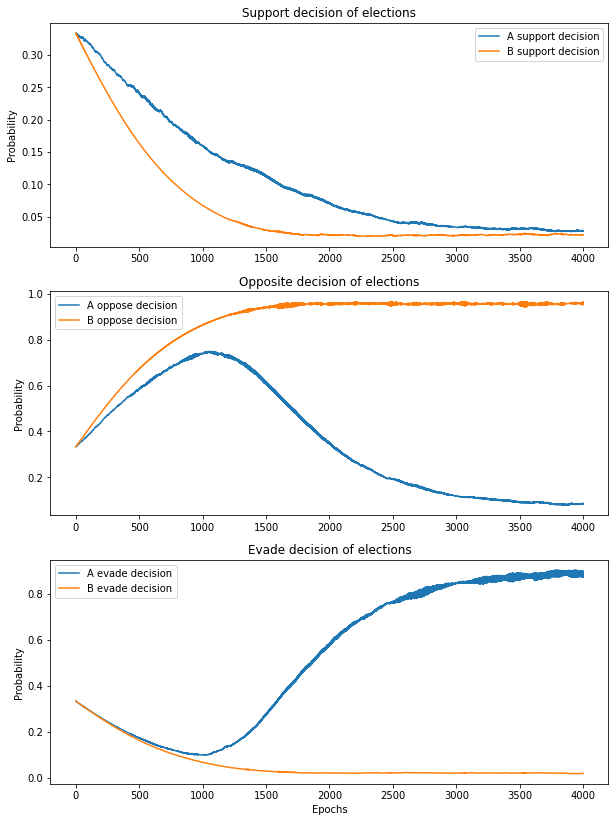

In [12]:
epochs_vector = np.linspace(0,epochs, epochs+1)

#Plotting information

plt.rcParams["figure.figsize"] = [10, 14]
fig, ax = plt.subplots(3,1)

ax[0].plot(epochs_vector,A_support,label="A support decision")
ax[0].plot(epochs_vector,B_support,label="B support decision")
ax[0].set_title("Support decision of elections")
ax[0].set_ylabel("Probability")

ax[1].plot(epochs_vector,A_oppose,label="A oppose decision")
ax[1].plot(epochs_vector,B_oppose,label="B oppose decision")
ax[1].set_title("Opposite decision of elections")
ax[1].set_ylabel("Probability")

ax[2].plot(epochs_vector,A_evade,label="A evade decision")
ax[2].plot(epochs_vector,B_evade,label="B evade decision")
ax[2].set_title("Evade decision of elections")
ax[2].set_ylabel("Probability")

ax[2].set_xlabel("Epochs")

ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()


We can see that the algorithm tend to the saddlepoint after the B opposite decision is greater than 90% and the A decision tend to the evade.